# Notebook Examples for Chapter 1

In [ ]:
!pip install google-api-python-client
!pip install pycryptodome
!pip install earthengine-api
!set http_proxy=http://127.0.0.1:10809
!set https_proxy=https://127.0.0.1:10809

In [1]:
import os
os.environ['http_proxy'] = "http://127.0.0.1:10809"
os.environ['https_proxy'] = "https://127.0.0.1:10809"
import ee
# Initialize the GEE API
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()
import ee

In [ ]:
import warnings
# these are innocuous but irritating
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
%matplotlib inline

### A Synthetic Aperture Image (Sentinel-1)

In [ ]:
import IPython.display as disp
import ee

ee.Initialize()

minlon = 6.31
minlat = 50.83
maxlon = 6.58
maxlat = 50.95

rect = ee.Geometry.Rectangle([minlon,minlat,maxlon,maxlat])
collection = ee.ImageCollection('COPERNICUS/S1_GRD') \
  .filterBounds(rect) \
  .filterDate(ee.Date('2017-05-01'), ee.Date('2017-06-01')) \
  .filter(ee.Filter.eq('transmitterReceiverPolarisation', ['VV','VH'])) \
  .filter(ee.Filter.eq('resolution_meters', 10)) \
  .filter(ee.Filter.eq('instrumentMode', 'IW')) 
    
image = ee.Image(collection.first()).clip(rect)                        
url = image.select('VV').getThumbURL({'min':-20,'max':0})
disp.Image(url=url)

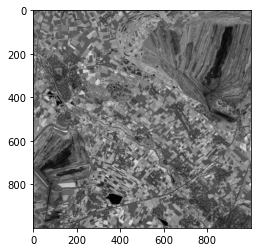

In [4]:
run scripts/ex1_1 imagery_initial/AST_20070501 3

### Covariance matrix of a multispectral image

In [2]:
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
import numpy as np

gdal.AllRegister()
infile = 'imagery_initial/AST_20070501'                
inDataset = gdal.Open(infile,GA_ReadOnly)     
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize    

#  data matrix
G = np.zeros((rows*cols,3))                                   
for b in range(3):
    band = inDataset.GetRasterBand(b+1)
    tmp = band.ReadAsArray(0,0,cols,rows).ravel()
    G[:,b] = tmp - np.mean(tmp)
    
#  covariance matrix
C = np.mat(G).T*np.mat(G)/(cols*rows-1)  
print (C)  

[[ 407.13229638  442.18038527  -78.32374081]
 [ 442.18038527  493.57036427 -120.64197555]
 [ -78.32374081 -120.64197555  438.95704379]]


### Eigenvalues and eigenvectors of the covariance matrix

In [2]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
print eigenvalues
print eigenvectors

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(eigenvalues)? (636282671.py, line 2)

In [ ]:
U = eigenvectors
print U.T*U

### Singular value decomposition

In [ ]:
import numpy as np
b = np.mat([1,2,3])
# an almost singular matrix
A = b.T*b + np.random.rand(3,3)*0.001
# a symmetric almost singular matrix
A = A + A.T
print 'determinant: %f'%np.linalg.det(A)
# singular value decomposition
U,Lambda,V = np.linalg.svd(A)
print 'Lambda = %s'%str(Lambda)
print 'U = %s'%str(U)
print 'V = %s'%str(V)


### Principal components analysis

In [3]:
run scripts/ex1_2 imagery_initial/AST_20070501 imagery_initial/pca.tif

In [ ]:
run scripts/dispms -f 'imagery/pca.tif' -p [1,2,3] -e 4